In [63]:
#from tpot import TPOTClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [11]:
# load
pref = ['C4_1_','C4_5_','C4_6_', 'C4_8_', 'C4_10_']
df_d = {}
for i in range(len(pref)):
    fname  = pref[i] + 'features.csv'
    df_d[i] = pd.read_csv(fname, decimal=',')
#df = pd.read_csv('C4_10_features.csv')
#df_d[4]  

In [12]:
df = pd.concat(df_d.values(), ignore_index=True)

In [13]:
# inspect
df

,HDF,Complexity,Mobility,classe
0,1.390931,-1.479577,2.473534,0
1,-0.015578,0.254281,-0.608793,0
2,0.404857,-0.775104,1.209464,0
3,1.767775,-1.228770,2.103808,0
4,0.495654,-0.557916,0.703988,0
...,...,...,...,...
30715,-1.842650,0.299518,-1.073747,1
30716,-1.193388,0.527062,-0.998790,1
30717,-0.325767,0.794264,-1.089969,1
30718,-2.354177,1.568383,-1.753640,1


In [14]:
# inspect types 
df.dtypes

HDF           float64
Complexity    float64
Mobility      float64
classe          int64
dtype: object

In [15]:
#df = df.astype(float)
#df

In [16]:
df.shape[1]

4

In [17]:
X = df.iloc[:,0:df.shape[1] -1].values
y = df.iloc[: , -1:].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, random_state=18, stratify=y)

In [37]:
feat = df.columns[0:3]

Feature HDF - Score: -0.06178
Feature Complexity - Score: -0.11104
Feature Mobility - Score: -0.13380


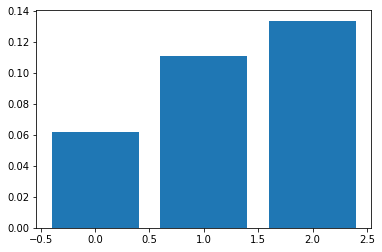

In [53]:
# FI with linear regression
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature %s - Score: %.5f' % (feat[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()

Feature: HDF -  Score: 0.29972
Feature: Complexity -  Score: 0.34196
Feature: Mobility -  Score: 0.35832


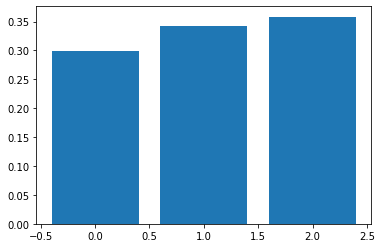

CPU times: user 333 ms, sys: 100 ms, total: 433 ms
Wall time: 251 ms


In [51]:
%%time
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s -  Score: %.5f' % (feat[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<timed exec>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature: HDF -  Score: 0.31417
Feature: Complexity -  Score: 0.33997
Feature: Mobility -  Score: 0.34586


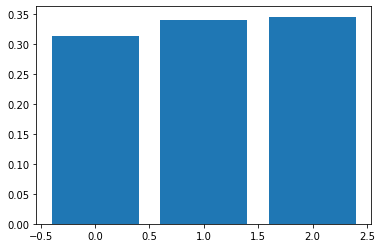

CPU times: user 6.88 s, sys: 104 ms, total: 6.99 s
Wall time: 6.82 s


In [64]:
%%time
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s -  Score: %.5f' % (feat[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [65]:
%%time
# define generations and populations
#reg = TPOTRegressor(generations=10,population_size=10, verbosity=2, random_state=21)
model = ExtraTreesClassifier(bootstrap=False, max_features=0.5, min_samples_leaf=2, min_samples_split=7, n_estimators=100)
model.fit(X_train,y_train)

<timed exec>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 968 ms, sys: 7.92 ms, total: 976 ms
Wall time: 985 ms


ExtraTreesClassifier(max_features=0.5, min_samples_leaf=2, min_samples_split=7)

In [66]:
%%time
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test,n_repeats=30,random_state=0)

CPU times: user 10.2 s, sys: 3.64 ms, total: 10.2 s
Wall time: 10.2 s


In [67]:
for i in r.importances_mean.argsort():#[::-1]:
    #if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print( f"{r.importances_mean[i]:.3f}" 
          f" +/- {r.importances_std[i]:.3f}"
          f"  - feature: {feat[i]:<8}"
         )

0.045 +/- 0.004  - feature: HDF     
0.062 +/- 0.005  - feature: Complexity
0.147 +/- 0.006  - feature: Mobility
